# Previsão de séries temporais: Método Theta e expansões

por **Cibele Russo**




Baseado em

- ASSIMAKOPOULOS, V., NIKOLOPOULOS, K. The theta model: a decomposition approach to forecasting. International Journal of Forecasting, v. 16, n. 4, p. 521-530, 2000.

Implementações:

https://www.statsmodels.org/devel/examples/notebooks/generated/theta-model.html

Leituras adicionais:

- FIORUCCI, J. A., PELLEGRINI, T. R., LOUZADA, F., PETROPOULOS, F., & KOEHLER, A. B. (2016). Models for optimising the theta method and their relationship to state space models. International Journal of Forecasting, 32(4), 1151-1161. Disponível em https://www.sciencedirect.com/science/article/pii/S0169207016300243. Acessado em 07/08/2022.


- FIORUCCI, J. A. (2016). Time series forecasting:advances on Theta method. Tese de doutorado. Disponível em https://repositorio.ufscar.br/bitstream/handle/ufscar/7399/TeseJAF.pdf?sequence=1&isAllowed=y. Acessado em 07/08/2022.

- PELLEGRINI, T. R. Uma avaliação de métodos de previsão aplicados à grandes quantidades de séries temporais univariadas. Dissertação de mestrado. Universidade Federal de São Carlos. 2012. Disponível em https://repositorio.ufscar.br/bitstream/handle/ufscar/4563/4757.pdf?sequence=1&isAllowed=y. Acessado em 07/08/2022.

- HYNDMAN, R. J., KOEHLER, A. B., SNYDER, R. D., \& GROSE, S. (2002). A state space framework for automatic forecasting using exponential smoothing methods. International Journal of Forecasting, 18(3), 439-454.

- HYNDMAN, R. J., & BILLAH, B. (2003). Unmasking the Theta method. International Journal of Forecasting, 19(2), 287-290.





## Método Theta

- O método Theta é simples e preciso para se fazer previsão (forecasting) em séries temporais.


- Premiado na Competição M3 de forecasting https://en.wikipedia.org/wiki/Makridakis_Competitions


- Suposição: A série é não-sazonal ou dessazonalizada


- Tem relação com o método de Suavização exponencial simples (SES)


**Resumo do Metodo Theta**


1. O método decompõe a série temporal original em duas novas linhas através dos chamados coeficientes Theta, que são aplicados à segunda diferença dos dados. O processo de decomposição tem a vantagem de explorar informações nos dados que geralmente não são capturados e modelados completamente através da extrapolação da série temporal original. 


2. As chamadas Linhas-Theta podem ser consideradas como novas séries temporais e são extrapoladas separadamente usando um método de previsão apropriado. 


3. Concluída a extrapolação de cada Linha Theta, a recomposição ocorre por meio de um esquema de combinação, a fim de calcular as previsões pontuais da série temporal original. 


4. A combinação das Linhas Theta é considerada para a previsão.







Os passos do algoritmo para a implementação (PELLEGRINI, 2012) são


1. **Teste de Sazonalidade**: Teste cada série temporal para verificar a existência de comportamento sazonal via teste para a função de autocorrelação, com lag de um ano para séries anuais, lag de 12 meses para séries mensais e lag de 4 meses para séries trimestrais e assim por diante.  

    De uma forma geral, a série é considerada sazonal se
    
    $$|r_m| > q_{1-a/2}\sqrt{\displaystyle\frac{1+2\sum_{i=1}^{m-1}r_i^2}{n}}$$ 
    
    em que $r_k$ é a função e autocorrelação de lag $k$, $m$ é o número de períodos do ciclo sazonal (por exemplo, 12 meses em uma sazonalidade anual), $n$ é o tamanho amostral, $q$ é o quantil da distribuição normal e $(1-a/2)$ é o nível de confiança do teste. Se a série for identificada como sazonal, é necessário fazer uma decomposição para eliminar a sazonalidade.  


2. **Dessazonalização**: Dessazonalize as séries temporais identificadas no passo 1 através do método de decomposição clássica (multiplicativo).


3. **Decomposição**: Cada série temporal é decomposta em duas linhas-Theta, $Z_t(0)$ e $Z_t(2)$.


4. **Extrapolação**: $Z_t(0)$ e $Z_t(2)$ são extrapoladas respectivamente através do modelo de regressão linear e do modelo de alisamento exponencial simples.


5. **Combinação**: As previsões produzidas por $\widehat{Z}_{t+h}(0)$ e $\widehat{Z}_{t+h}(2)$ são combinadas a partir da média aritmética.


6. **Resazonalização**: As previsões do passo anterior são resazonalizadas resultando nas previsões finais.


## O Método Theta 


O método Theta é baseado no conceito de modificação das curvaturas locais da série temporal.   Esta  mudança  é  obtida  a  partir  de  um  coeficiente,  denominado  coeficiente Theta,  denotado  pela  letra  grega  $\theta$. 


Originalmente, ASSIMAKOPOULOS & NIKOLOPOULOS (2000) propuseram a Linha Theta como a solução da equação

$$\Delta^2 Z_t(\theta) = \theta \Delta^2 Y_t, t=3,\ldots,n$$


em que 

$Y_1,\ldots, Y_n$ é a série original (não sazonal ou dessazonalizada) e $\Delta$ é o operador diferença 

$$\Delta Z_t = Z_t - Z_{t-1}.$$

Os valores iniciais de $Z_1$ e $Z_2$ são obtidos minimizando

$$\sum_{t=1}^{n} [Y_t - Z_t(\theta)]^2$$

Entretanto, uma solução analítica para calcular $Z(\theta)$ é dada por

$$Z_t(\theta) = \theta Y_t + (1-\theta)(A_n + B_n t), \ t=1,\ldots, n$$

em que $A_n$ e $B_n$ são coeficientes de mínimos quadrados de um modelo de regressão linear de $Y_1,\ldots, Y_n$ contra $1,\ldots,n$ (as expressões são dadas em FIORUCCI (2016)).

## Generalizações para o Método Theta 

- Existem algumas propostas de generalização do Método Theta na literatura

- Modelos para otimizar o Método Theta são apresentados por FIORUCCI et. al (2016)

### Modelo Theta Otimizado

- Algumas adaptações são feitas e o modelo é reescrito como um modelo de espaço de estado (FIORUCCI et. al, 2016)

$\begin{array}{lll}
Y_t &=& \mu_t + \epsilon_t,\\
\mu_t &= & {{l}}_{t-1} + \left(1-\displaystyle{\frac{1}{\theta}}\right) \left\{(1-\alpha)^{t-1} A_n + \left[\displaystyle\frac{1-(1-\alpha)^t}{\alpha}\right] B_n\right\},\\
{l}_t &=& \alpha Y_t + (1-\alpha){l}_{t-1}
\end{array}$

com parâmetros ${l}_0 \in \mathbb{R}$, $\alpha\in(0,1)$ e $\theta\in[1,\infty]$.




A previsão pra $h$ passos à frente com origem em n é dada por

$\begin{array}{lll}\widehat{Y}_{n+h|n} &=& E[Y_{n+h}|Y_1,\ldots,Y_n]\\
&=&{l}_n + \left(\displaystyle 1-\frac{1}{\theta}\right)\times \\
&& \left\{(1-\alpha)^n A_n + \left[(h-1)+\displaystyle\frac{1-(1-\alpha)^{n+1}}{\alpha}\right] B_n\right\}\end{array}$

Além disso, é possível obter um intervalo de predição com nível de confiança de $(1-a)\%$

$\widehat{Y}_{n+h|n} \pm q_{1-a/2}\sqrt{[1+(h-1)\alpha^2]\sigma^2}$.

Se $\theta = 2$ é possível mostrar que este método produz as mesmas previsões do método usual.


### Modelo Theta Otimizado dinâmico

- Ver FIORUCCI et al. (2016)

- $A_n$ e $B_n$, que antes eram considerados coeficientes fixos, agora são considerados funções dinâmicas, isto é, para atualizar do estado $t$ para o estado $t+1$ consideramos somente a informação prévia $Y_1,\ldots, Y_t$ para calcular $A_t$ e $B_t$, e então usamos esses termos no lugar de $A_n$ e $B_n$.

Assim, 


$\begin{array}{lll}\widehat{Y}_{t+1|t} &=& {l}_t + \left(\displaystyle 1-\frac{1}{\theta}\right)\times \\
&& \left\{(1-\alpha)^t A_t + \left[\displaystyle\frac{1-(1-\alpha)^{t+1}}{\alpha}\right] B_t\right\}\end{array}$

Então, assumindo erros aditivos um passo à frente, temos

$\begin{array}{lll}
Y_t &=& \mu_t + \epsilon_t,\\
\mu_t &= & {l}_{t-1} + \left(1-\displaystyle{\frac{1}{\theta}}\right) \left\{(1-\alpha)^{t-1} A_{t-1} + \left[\displaystyle\frac{1-(1-\alpha)^t}{\alpha}\right] B_{t-1}\right\}\\
{l}_t &=&\alpha Y_t + (1-a){l}_{t-1}.\end{array}$


As expressões para $A_t$, $B_t$, tal como valores iniciais podem ser vistas em FIORUCCI et al. (2016).

## Aplicação do Método Theta em Python

In [1]:
# No colab, execute esta célula e "RESTART RUNTIME"
!pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure",figsize=(12,6))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("darkgrid")

In [3]:
#pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'
#df = pd.read_csv(f'{pkgdir}/PETR4.csv', index_col=0, parse_dates=True)

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/PETR4.csv', index_col=0, parse_dates=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-18,11.79,12.27,10.87,11.29,11.289389,162515200
2020-03-19,11.07,13.07,10.85,12.21,12.209339,157065200
2020-03-20,13.11,13.50,11.83,12.00,11.999351,149029900
2020-03-23,12.11,12.18,11.28,11.50,11.499378,107092400
2020-03-24,12.57,13.54,12.28,13.25,13.249283,114259200


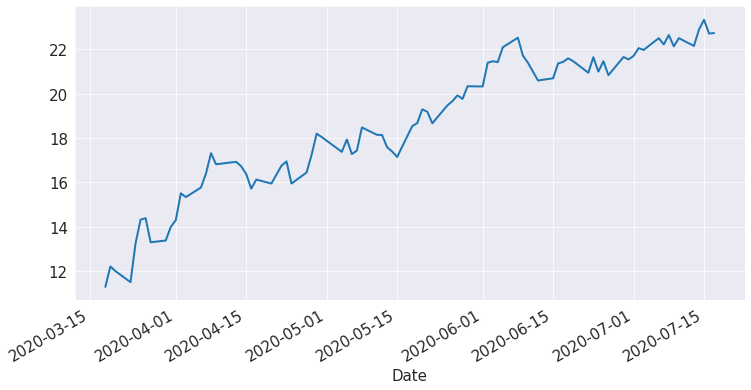

In [4]:
df['Close'].plot();

In [5]:
df.index

DatetimeIndex(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-13', '2020-04-14', '2020-04-15',
               '2020-04-16', '2020-04-17', '2020-04-20', '2020-04-22',
               '2020-04-23', '2020-04-24', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30', '2020-05-04', '2020-05-05',
               '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-11',
               '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15',
               '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
               '2020-05-22', '2020-05-25', '2020-05-26', '2020-05-27',
               '2020-05-28', '2020-05-29', '2020-06-01', '2020-06-02',
               '2020-06-03', '2020-06-04', '2020-06-05', '2020-06-08',
      

In [6]:
idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
df = df.reindex(idx)
df.fillna(method='ffill', inplace=True)

In [7]:
df.index

DatetimeIndex(['2020-03-18', '2020-03-19', '2020-03-20', '2020-03-23',
               '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
               '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02',
               '2020-04-03', '2020-04-06', '2020-04-07', '2020-04-08',
               '2020-04-09', '2020-04-10', '2020-04-13', '2020-04-14',
               '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30',
               '2020-05-01', '2020-05-04', '2020-05-05', '2020-05-06',
               '2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20', '2020-05-21', '2020-05-22',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
      

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  after removing the cwd from sys.path.


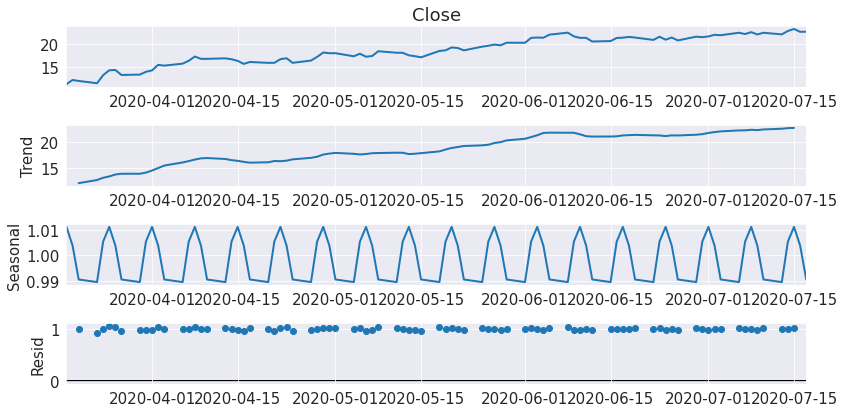

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(df['Close'], model='multiplicative', freq=5)
result.plot()

pyplot.show()

In [9]:
from statsmodels.tsa.forecasting.theta import ThetaModel
tm = ThetaModel(df['Close'])
res = tm.fit()
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  Close   No. Observations:                   88
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Fri, 12 Aug 2022   Deseas. Method:         Multiplicative
Time:                        22:05:55   Period:                              5
Sample:                    03-18-2020                                         
                         - 07-17-2020                                         
  Parameter Estimates   
          Parameters    
------------------------
b0    0.1162118401588179
alpha 0.9125105052007179
------------------------


In [10]:
res = ThetaModel(df['Close'],deseasonalize=True,period=5).fit()
fcast = res.forecast(24)


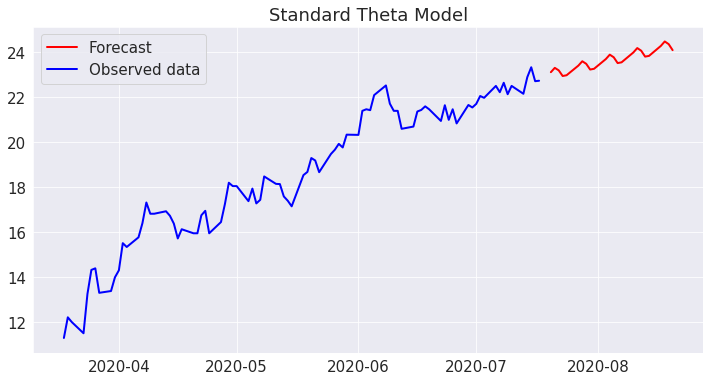

In [11]:
plt.figure(figsize = (12,6))

plt.plot(fcast,  color = 'red', label = 'Forecast')
plt.plot(df['Close'],color = 'blue', label = 'Observed data')

            
plt.title('Standard Theta Model')
plt.legend()
plt.show()

In [12]:
tm = ThetaModel(df['Close'], method="multiplicative")
res = tm.fit(use_mle=True)
print(res.summary())

                              ThetaModel Results                              
Dep. Variable:                  Close   No. Observations:                   88
Method:                           MLE   Deseasonalized:                   True
Date:                Fri, 12 Aug 2022   Deseas. Method:               Additive
Time:                        22:05:55   Period:                              5
Sample:                    03-18-2020                                         
                         - 07-17-2020                                         
  Parameter Estimates   
          Parameters    
------------------------
b0    0.1338257188850377
alpha 0.8208497367179584
------------------------


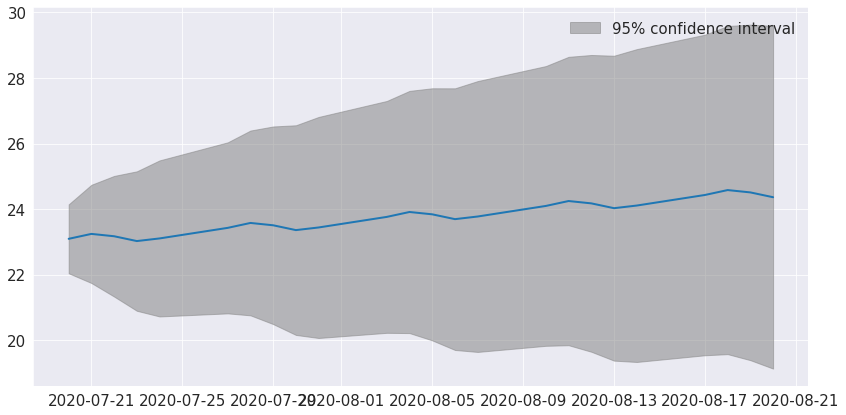

In [13]:
ax = res.plot_predict(24, theta=2)


**Exercício:** Calcule as métricas como erro quadrático médio, erro absoluto médio e raiz do erro quadrático médio para as previsões pontuais pelo método Theta.